# Plotting - When to use what?

|Method|When to Use|
|------|-----------|
|plt.subplot()|Quick demos, small number of plots|
|plt.subplots()|Recommended for larger or dynamic layouts|


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a small sample DataFrame
df = pd.DataFrame({
    'Age': np.random.randint(22, 60, 50),
    'Salary': np.random.normal(50000, 8000, 50),
    'Gender': np.random.choice(['Male', 'Female'], 50)
})

## 1. plt.subplot() Approach — Quick & Simple Syntax

- plt.subplot(rows, cols, index) specifies which subplot to draw in.
- It’s imperative — you must call it before each plot.

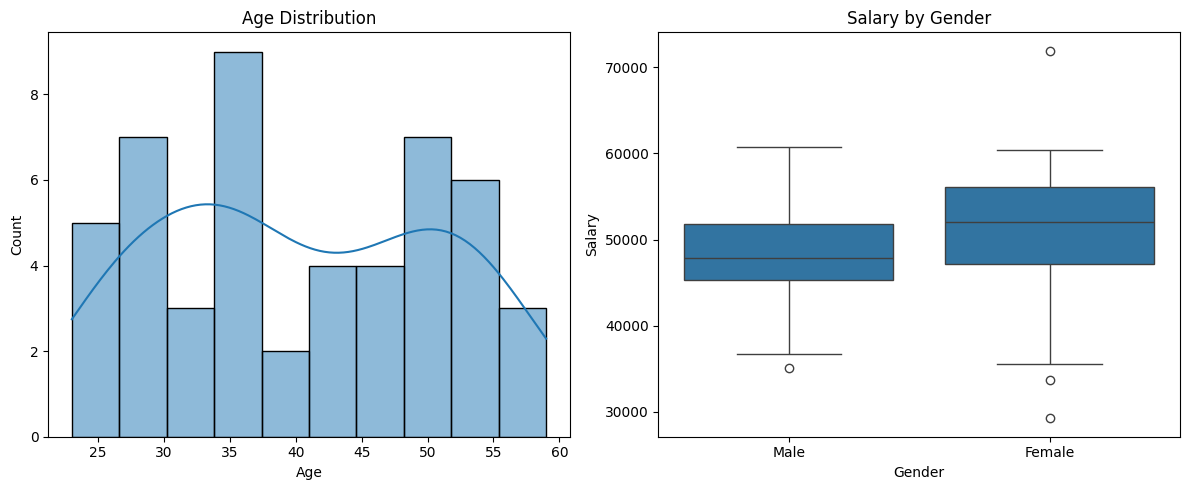

In [2]:
plt.figure(figsize=(12, 5))

# First subplot: Histogram of Age
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title("Age Distribution")

# Second subplot: Boxplot of Salary by Gender
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Gender', y='Salary')
plt.title("Salary by Gender")

plt.tight_layout()
plt.show()

## 2. plt.subplots() and ax=... Approach — More Explicit (and Preferred for Complex Plots)

- axes[0], axes[1], … represent the subplot areas.
- You can pass each ax=... into Seaborn or use axes[i].plot(...) for Matplotlib.
- This method is cleaner, more scalable, and better when looping.

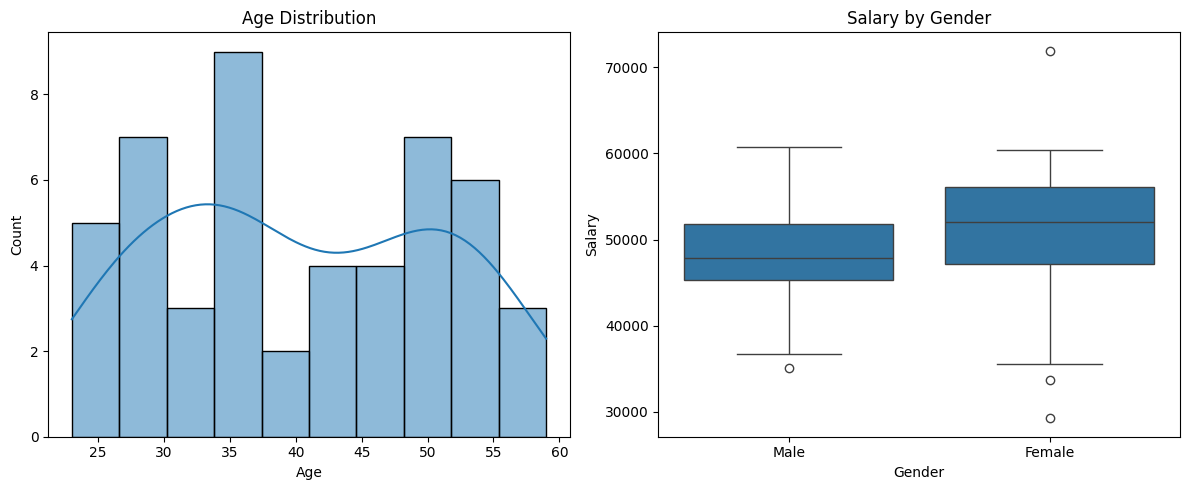

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot on the first axis
sns.histplot(data=df, x='Age', bins=10, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

# Plot on the second axis
sns.boxplot(data=df, x='Gender', y='Salary', ax=axes[1])
axes[1].set_title("Salary by Gender")

plt.tight_layout()
plt.show()

Notes
- tight_layout() prevents labels from overlapping.
- ax=axes[i] makes it clear which subplot you’re targeting.
- These examples use random data; feel free to adjust the distributions.

## Pairplots

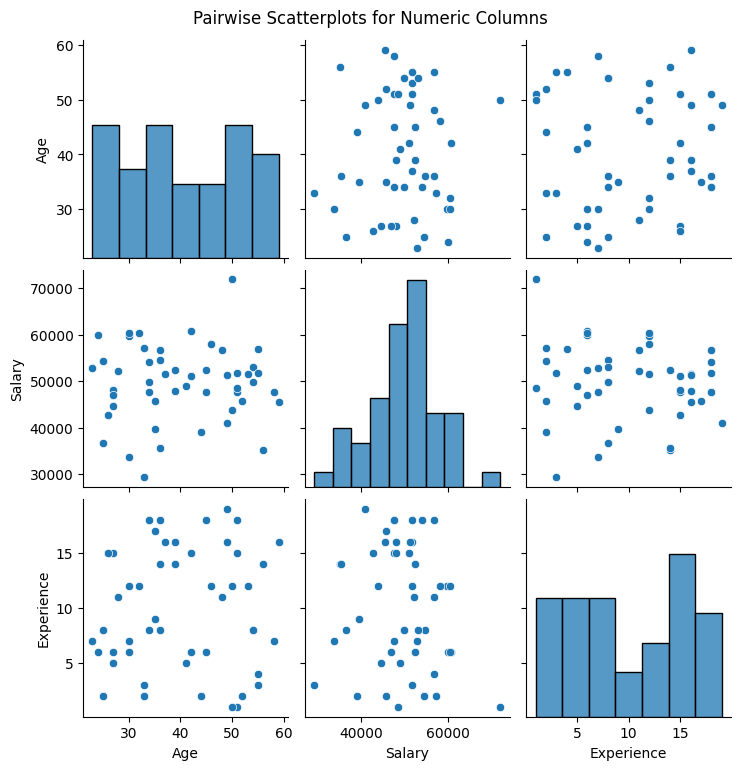

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Experience'] = np.random.randint(1, 20, size=len(df))

# Only use numeric columns
sns.pairplot(df.select_dtypes(include=np.number))
plt.suptitle("Pairwise Scatterplots for Numeric Columns", y=1.02)
plt.show()

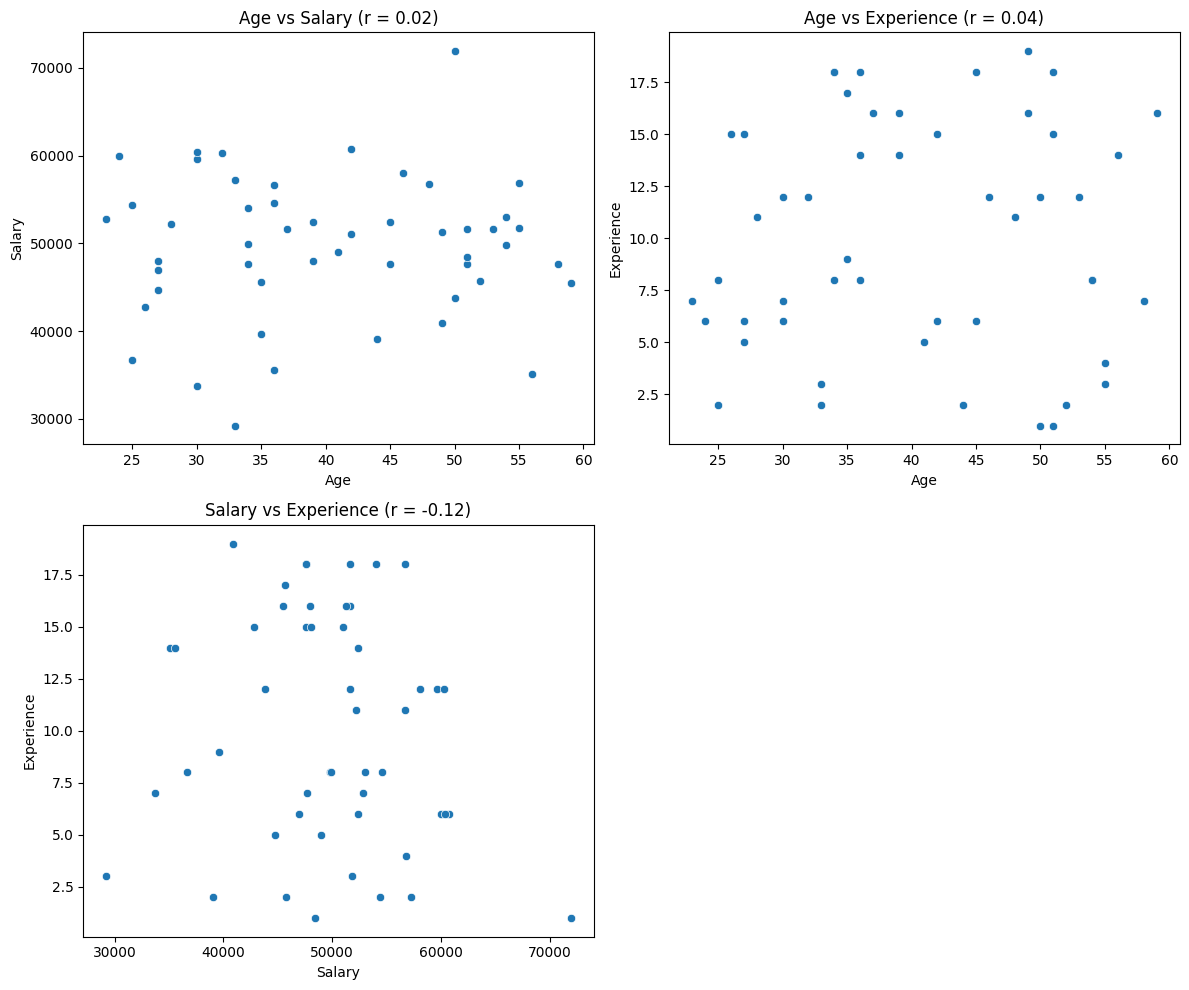

In [8]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Generate all unique pairs of numeric features
pairs = list(itertools.combinations(numeric_cols, 2))

# Create a grid of scatterplots
n_cols = 2
n_rows = int(np.ceil(len(pairs) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))

# Flatten axes array in case it's 2D
axes = axes.flatten()

for idx, (col_x, col_y) in enumerate(pairs):
    ax = axes[idx]
    sns.scatterplot(x=col_x, y=col_y, data=df, ax=ax)
    corr = df[col_x].corr(df[col_y])
    ax.set_title(f"{col_x} vs {col_y} (r = {corr:.2f})")

# Hide any unused subplots
for j in range(len(pairs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()